In [1]:
# Installs
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Scikit-learn components
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

In [4]:
# For saving/loading the model
import joblib

In [5]:
# Load the Dataset
# Load with ';' separator and quoted strings
mat_df = pd.read_csv("Data/PerformanceCheck/student-mat.csv", sep=';')
por_df = pd.read_csv("Data/PerformanceCheck/student-por.csv", sep=';')

mat_df.head()
mat_df.shape, por_df.shape #check shapes

((395, 33), (649, 33))

In [6]:
#data exploration
# Info
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
# Basic statistics for numeric columns
mat_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
#Class balance for the final grade G3
mat_df['G3'].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

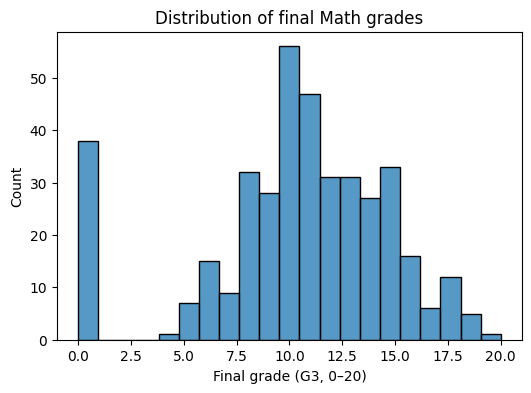

In [9]:
#Simple Plot
plt.figure(figsize=(6,4))
sns.histplot(mat_df['G3'], bins=21, kde=False)
plt.xlabel('Final grade (G3, 0–20)')
plt.ylabel('Count')
plt.title('Distribution of final Math grades')
plt.show()

In [10]:
# classification target (pass=1>=10 vs fail=0<=10)
mat_df = mat_df.copy()  # avoid accidental view issues

# Create binary target
mat_df['pass_math'] = (mat_df['G3'] >= 10).astype(int)

mat_df[['G3', 'pass_math']].head(10)

,G3,pass_math
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1
5,15,1
6,11,1
7,6,0
8,19,1
9,15,1


In [11]:
#check class balance
mat_df['pass_math'].value_counts(normalize=True)

pass_math
1    0.670886
0    0.329114
Name: proportion, dtype: float64

In [12]:
# Drop grade columns from features
feature_cols = [col for col in mat_df.columns if col not in ['G1', 'G2', 'G3', 'pass_math']]

X = mat_df[feature_cols]
y = mat_df['pass_math']

X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [13]:
#identify numeric vs categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols

(['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences'],
 ['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic'])

In [14]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((316, 30), (79, 30))

In [15]:
# Build
# Preprocess numeric features: standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocess categorical features: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Full pipeline: preprocessing + classifier
log_reg_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

In [16]:
#Train the model
log_reg_clf.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contai

In [17]:
#inspect the class labels
log_reg_clf.named_steps['clf'].classes_

array([0, 1])

In [18]:
## Evaluate the model
# Predictions
y_pred = log_reg_clf.predict(X_test)

In [19]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.3f}")

Test accuracy: 0.658


In [20]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['fail', 'pass']))

              precision    recall  f1-score   support

        fail       0.47      0.35      0.40        26
        pass       0.72      0.81      0.76        53

    accuracy                           0.66        79
   macro avg       0.60      0.58      0.58        79
weighted avg       0.64      0.66      0.64        79



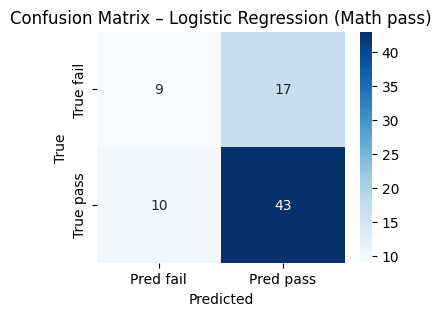

In [21]:
#Confusion matrix + heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred fail', 'Pred pass'],
    yticklabels=['True fail', 'True pass']
)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix – Logistic Regression (Math pass)')
plt.show()


In [22]:
# Persist (save) the trained model
model_path = "log_reg_student_math_pass.joblib"

joblib.dump(log_reg_clf, model_path)

print(f"Model saved to: {model_path}")

Model saved to: log_reg_student_math_pass.joblib


In [23]:
# Load the saved model and predict
# Load from disk
loaded_model = joblib.load(model_path)

# Take a few "new" samples (from the test set)
X_new = X_test.iloc[:5]
y_true = y_test.iloc[:5]

print("Sample input:")
display(X_new)

y_new_pred = loaded_model.predict(X_new)

print("True labels:     ", y_true.values)
print("Predicted labels:", y_new_pred)

Sample input:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
305,GP,F,18,U,GT3,T,2,4,services,at_home,...,yes,yes,no,4,4,3,1,1,3,8
225,GP,F,18,R,GT3,T,3,1,other,other,...,yes,yes,yes,5,3,3,1,1,4,16
237,GP,F,16,U,GT3,T,2,1,other,other,...,yes,yes,yes,4,5,2,1,1,5,20
318,GP,F,17,R,GT3,T,3,4,at_home,services,...,yes,yes,no,4,3,4,2,5,5,0
182,GP,F,17,U,GT3,T,2,4,services,services,...,yes,no,no,5,4,2,2,3,5,0


True labels:      [1 0 1 1 1]
Predicted labels: [0 0 1 1 1]


In [24]:
# with probabilities
y_new_proba = loaded_model.predict_proba(X_new)
y_new_proba   # columns correspond to [fail, pass]

array([[0.69858086, 0.30141914],
       [0.83244009, 0.16755991],
       [0.4476966 , 0.5523034 ],
       [0.13802482, 0.86197518],
       [0.05631142, 0.94368858]])

In [25]:
# Adapting this to Portuguese
#repeat exactly the same logic

por = por_df.copy()
por['pass_por'] = (por['G3'] >= 10).astype(int)

feature_cols_por = [col for col in por.columns if col not in ['G1', 'G2', 'G3', 'pass_por']]

X_por = por[feature_cols_por]
y_por = por['pass_por']

numeric_cols_por = X_por.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_por = X_por.select_dtypes(include=['object']).columns.tolist()

X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(
    X_por, y_por,
    test_size=0.2,
    random_state=42,
    stratify=y_por
)

preprocessor_por = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols_por),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_por)
    ]
)

log_reg_por = Pipeline(steps=[
    ('preprocess', preprocessor_por),
    ('clf', LogisticRegression(max_iter=1000))
])

log_reg_por.fit(X_train_por, y_train_por)

y_pred_por = log_reg_por.predict(X_test_por)
print("Portuguese – test accuracy:", accuracy_score(y_test_por, y_pred_por))

joblib.dump(log_reg_por, "log_reg_student_por_pass.joblib")


Portuguese – test accuracy: 0.7923076923076923


['log_reg_student_por_pass.joblib']